# Implement First

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
sess = tf.Session()
def print_variables(keys):
    i = 0
    print(keys)
    while True:
        try:
            print(tf.get_collection(keys)[i])
            i+=1
        except IndexError:
            break;

# tf.nn.xw_plus_b

In [4]:
x = tf.constant([[1,2]])
w = tf.constant([[3],[1]])
b = tf.constant([1])
# 1*3 + 2*1+1= 6
print(sess.run(tf.nn.xw_plus_b(x,w,b)))

[[6]]


# tf.nn.embedding_lookup(params, ids)

change ids to params embedding[m, n]  
type of elements in ids should be int(less than m)  
ids are any size of tensor.  
Every elements of ids changes to corresponding params[i]
* See also with **tf.gather**

In [2]:
embedding = tf.Variable(tf.random_uniform([3, 5]))
x = tf.nn.embedding_lookup(embedding, [2, 1, 2, 0])
sess.run(tf.global_variables_initializer())
print(sess.run(embedding))
print(sess.run(x))

[[ 0.65916538  0.31374788  0.46987545  0.16130471  0.52711689]
 [ 0.09688437  0.6438216   0.37012732  0.72636056  0.37062776]
 [ 0.34294486  0.8576411   0.96145344  0.03932071  0.14303041]]
[[ 0.34294486  0.8576411   0.96145344  0.03932071  0.14303041]
 [ 0.09688437  0.6438216   0.37012732  0.72636056  0.37062776]
 [ 0.34294486  0.8576411   0.96145344  0.03932071  0.14303041]
 [ 0.65916538  0.31374788  0.46987545  0.16130471  0.52711689]]


In [6]:
embedding1 = tf.Variable([[1,2],[3,4]])
embedding2 = tf.Variable([[5,6],[7,8]])
x = tf.nn.embedding_lookup([embedding1, embedding2], [0,1,2,3,1,2], partition_strategy='mod')
y = tf.nn.embedding_lookup([embedding1, embedding2], [0,1,2,3,1,2], partition_strategy='div')
sess.run(tf.global_variables_initializer())
print(sess.run(embedding1))
print(sess.run(embedding2))
print(sess.run(x))
print(sess.run(y))

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[1 2]
 [5 6]
 [3 4]
 [7 8]
 [5 6]
 [3 4]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]
 [3 4]
 [5 6]]


# tf.exp
    안에는 무조건 실수 여야 한다.

In [7]:
print(sess.run(tf.exp(1.0)))

2.71828


# tf.sqrt

In [17]:
x = tf.constant([1,2,3], dtype = tf.float32)
print("x")
print(sess.run(x))
print('tf.sqrt(x)')
print(sess.run(tf.sqrt(x)))

x
[ 1.  2.  3.]
tf.sqrt(x)
[ 1.          1.41421354  1.73205078]


# tf.tile

In [16]:
x = tf.constant([1,2,3], dtype = tf.float32)
print("x")
print(sess.run(x))
print('tf.tile(x,[1,3])')
temp = tf.tile(x,[3])
print(sess.run(temp))
#plus
temp2 = tf.split(temp, 3, axis = 0)
print(sess.run(temp2))
temp3 = tf.stack(temp2)
print(sess.run(temp3))

x
[ 1.  2.  3.]
tf.tile(x,[1,3])
[ 1.  2.  3.  1.  2.  3.  1.  2.  3.]
[array([ 1.,  2.,  3.], dtype=float32), array([ 1.,  2.,  3.], dtype=float32), array([ 1.,  2.,  3.], dtype=float32)]
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]


# Basic div and mul

In [2]:
x = tf.constant([1,2,3], dtype = tf.float32)
y = tf.constant([2,4,6], dtype = tf.float32)
print("x")
print(sess.run(x))
print("y")
print(sess.run(y))
print("x/y")
print(sess.run(x/y))
print("x*y")
print(sess.run(x*y))

x
[ 1.  2.  3.]
y
[ 2.  4.  6.]
x/y
[ 0.5  0.5  0.5]
x*y
[  2.   8.  18.]


# tf.group

In [7]:
x = tf.Variable(1)
y = tf.Variable(2)
x_op = tf.assign(x, x+1)
y_op = tf.assign(y, y*2)

ops = tf.group(x_op, y_op)
sess.run(tf.global_variables_initializer())
sess.run(ops)

print(sess.run(x))
print(sess.run(y))

2
4


# tf.train.ExponentialMovingAverage

trainable_variables
Tensor("w/read:0", shape=(), dtype=float32)
Tensor("b/read:0", shape=(), dtype=float32)
moving_average_variables
ema.average(w) : variable
Tensor("w/ExponentialMovingAverage/read:0", shape=(), dtype=float32)
ema.average_name(w) : name
w/ExponentialMovingAverage
<class 'dict'>
ema.variables_to_restore() : name to variable
{'w/ExponentialMovingAverage': <tensorflow.python.ops.variables.Variable object at 0x7fa8101c05f8>, 'b/ExponentialMovingAverage': <tensorflow.python.ops.variables.Variable object at 0x7fa8177c1b70>}


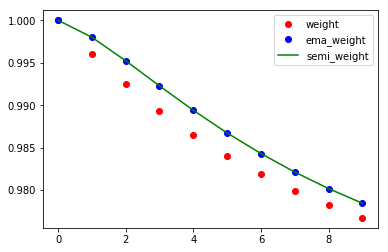

In [2]:
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

w = tf.Variable(1.0, name ='w')
b = tf.Variable(0.1, name ='b')

hypothesis = w * x_data + b
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
print_variables("trainable_variables")
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss = cost, var_list = [w, b])

ema = tf.train.ExponentialMovingAverage(decay = 0.5)


print_variables("moving_average_variables")

with tf.control_dependencies([train]):
    temp = ema.apply([w, b])

sess = tf.Session()
sess.run(tf.global_variables_initializer())
#train_op = tf.group(temp)
    
print("ema.average(w) : variable")
print(ema.average(w))
print("ema.average_name(w) : name")
print(ema.average_name(w))
print(type(ema.variables_to_restore()))
print("ema.variables_to_restore() : name to variable")
print(ema.variables_to_restore())

weight_track = []
ema_weight_track = []
x_axis = []
semi_weight_track = []
for step in range(10):
    weight_track.append(sess.run(w))
    ema_weight_track.append(sess.run(ema.average(w)))# already initialized with weight
    if step==0:
        semi_weight_track.append(sess.run(w))
    else:
        semi_weight_track.append(weight_track[-1]*0.5 + semi_weight_track[-1]*0.5)    
    x_axis.append(step)
    sess.run(temp)

plt.plot(x_axis, weight_track, 'ro',label = 'weight')
plt.plot(x_axis, ema_weight_track, 'bo', label = 'ema_weight')
plt.plot(x_axis, semi_weight_track, 'g', label = 'semi_weight')
plt.legend()
plt.show()

# tf.reduce_sum

In [3]:
x = tf.constant([[1,2,3],[4,5,6]])
print("x")
print(sess.run(x))
print("tf.reduce_sum(x,[1])")
print(sess.run(tf.reduce_sum(x,[1])))

x
[[1 2 3]
 [4 5 6]]
tf.reduce_sum(x,[1])
[ 6 15]


# tf.cast

In [4]:
x = tf.constant([1.8])
print("x")
print(x)
print("tf.cast(x,'int')")
print(tf.cast(x,tf.int32))
print(sess.run(tf.cast(x,tf.int32)))
print("x is unchanged")
print(x)
print("tf.cast(x,'bool')")
print(tf.cast(x,tf.bool))

x
Tensor("Const_2:0", shape=(1,), dtype=float32)
tf.cast(x,'int')
Tensor("Cast:0", shape=(1,), dtype=int32)
[1]
x is unchanged
Tensor("Const_2:0", shape=(1,), dtype=float32)
tf.cast(x,'bool')
Tensor("Cast_2:0", shape=(1,), dtype=bool)


# tf.argmax

In [3]:
x = tf.constant([[1,2,3],[2,3,1]])
print("x : {}".format(sess.run(x)))
print("tf.argmax(x,0)")
print(sess.run(tf.argmax(x,0)))
print("tf.argmax(x,1)")
print(sess.run(tf.argmax(x,1)))

x : [[1 2 3]
 [2 3 1]]
tf.argmax(x,0)
[1 1 0]
tf.argmax(x,1)
[2 1]


# tf.random_uniform
    default : random_uniform[0 to 1] with the shape
    min_val, max_val to control random_unirom[min_val to 1]

In [3]:
x = tf.random_uniform([2,3])# almost like a constant
print("x : tf.random_uniform([2,3])")
print(sess.run(x))
y = tf.random_uniform([2,3],minval=2, maxval=3)
print("y : tf.random_uniform([2,3],minval=2, maxval=3)")
print(sess.run(y))
z = tf.Variable(y)
print('tf.get_collection("variables")[-1]')
print(tf.get_collection('variables')[-1])
sess.run(tf.variables_initializer([tf.get_collection('variables')[-1]]))
print("z : tf.Variable(y)")
print(sess.run(z))
w = tf.Variable(tf.constant([0,1]))
print(tf.get_collection('variables')[-1])
sess.run(tf.variables_initializer([tf.get_collection('variables')[-1]]))
print(sess.run(w))

x : tf.random_uniform([2,3])
[[ 0.90442967  0.45734906  0.48704255]
 [ 0.82854152  0.82189322  0.72934389]]
y : tf.random_uniform([2,3],minval=2, maxval=3)
[[ 2.98311114  2.23425007  2.31004858]
 [ 2.07104158  2.71988559  2.32173228]]
tf.get_collection("variables")[-1]
Tensor("Variable_2/read:0", shape=(2, 3), dtype=float32)
z : tf.Variable(y)
[[ 2.15343928  2.2865901   2.19007039]
 [ 2.17396927  2.52031994  2.62790036]]
Tensor("Variable_3/read:0", shape=(2,), dtype=int32)
[0 1]


# tf.sign

In [4]:
x = tf.constant([[-1,2],[3,-4]],dtype = tf.float32)
print("x : tf.constant([[-1,2],[3,-4]],dtype = tf.float32)")
print(sess.run(x))
print("tf.sign(x)")
print(sess.run(tf.sign(x)))
print("(tf.sign(x)+1)/2")
print(sess.run((tf.sign(x)+1)/2))

x : tf.constant([[-1,2],[3,-4]],dtype = tf.float32)
[[-1.  2.]
 [ 3. -4.]]
tf.sign(x)
[[-1.  1.]
 [ 1. -1.]]
(tf.sign(x)+1)/2
[[ 0.  1.]
 [ 1.  0.]]


# tf.nn.moments

In [7]:
x = tf.constant([[3,4,5],[1,2,4]],dtype = tf.float32)
mean, var = tf.nn.moments(x,[0], name = 'hi')
print(mean)
print(var)
print(sess.run(mean))
print(sess.run(var))
print(sess.run(tf.nn.moments(x,[1],name = 'hi2')))
print(sess.run(tf.nn.moments(x,[0,1],name = 'hi2')))

Tensor("hi_4/hi_1/mean:0", shape=(3,), dtype=float32)
Tensor("hi_4/hi_1/variance:0", shape=(3,), dtype=float32)
[ 2.   3.   4.5]
[ 1.    1.    0.25]
(array([ 4.        ,  2.33333325], dtype=float32), array([ 0.66666669,  1.5555557 ], dtype=float32))
(3.1666667, 1.8055556)


# tf.range, tf.size, tf.gather

In [3]:
x = tf.constant([3,4,5,6])
print("x")
print(sess.run(x))
print("tf.size(x)")
print(sess.run(tf.size(x)))
print("tf.range(0,tf.size(x))")
print(sess.run(tf.range(0, tf.size(x))))
print("tf.gather(x, [1,2,2,1])")
print(sess.run(tf.gather(x,[1,2,2,1])))
print("tf.gather(x, [1,3,0])")
print(sess.run(tf.gather(x,[1,3,0])))

x
[3 4 5 6]
tf.size(x)
4
tf.range(0,tf.size(x))
[0 1 2 3]
tf.gather(x, [1,2,2,1])
[4 5 5 4]
tf.gather(x, [1,3,0])
[4 6 3]


# tf.assign(ref, value, validate_shape, use_locking)
    ref : a mutable tensor variable, may be unitialized
    value : a Tensor, same time as ref the value assigned to variable
    validate shape : default true, ture the shape of 'value' matches the shape of the tensor assigned 
                    otherwise shape of 'ref' = shape of 'value'
    

In [2]:
x = tf.Variable([1.], name = 'x')
x_op = tf.assign(x, [2.,3.,4.], validate_shape=False,name= 'tempx')
sess.run(tf.global_variables_initializer())
print(sess.run(x_op))
print(sess.run(x))

[ 2.  3.  4.]
[ 2.  3.  4.]


# tf.control_dependencies

In [2]:
x = tf.Variable([1.])
x_op = tf.assign(x, [2.])
with tf.control_dependencies([x_op]):
    y = tf.add(x, [1.])
sess.run(tf.global_variables_initializer())
print(sess.run(y))
print(sess.run(x))

[ 3.]
[ 2.]


In [3]:
x = tf.Variable([1.])
x_op = tf.assign(x, [2.])
y = tf.add(x, [1.])
sess.run(tf.global_variables_initializer())
print(sess.run(y))
print(sess.run(x))
print(sess.run(x_op))
print(sess.run(x))
print(sess.run(y))

[ 2.]
[ 1.]
[ 2.]
[ 2.]
[ 3.]


# tf.get_default_graph

In [12]:
c = tf.constant(4.0)
print(c.graph)
print(tf.get_default_graph())

# tf.is_inf, tf.is_finite, tf.is_nan
    Must be float in tf.log

In [3]:
print(sess.run(tf.is_inf(tf.log(0.0))))
print(sess.run(tf.is_inf(tf.log(0.5))))
print(sess.run(tf.is_finite(1.0)))
print(sess.run(tf.is_nan(-tf.log(-1.0))))
print(sess.run(tf.is_nan(-tf.log(1.0))))

True
False
True
True
False


# tf.identity

In [8]:
x = tf.constant(2.0)
y = tf.identity(x)
print(sess.run(x))
print(sess.run(y))

2.0
2.0


# tf.cond

In [9]:
x = tf.constant(2)
y = tf.constant(5)
def f1(): 
    return tf.multiply(x, 17)
def f2(): 
    return tf.add(y, 23)
r = tf.cond(tf.less(x, y), f1, f2)
print(r)
print(sess.run(r))

Tensor("cond/Merge:0", shape=(), dtype=int32)
34


# tf.clip_by_value()

In [4]:
print(sess.run(tf.clip_by_value(0, clip_value_max=5, clip_value_min=3)))
print(sess.run(tf.clip_by_value(7, clip_value_max=5, clip_value_min=3)))
print(sess.run(tf.clip_by_value(4, clip_value_max=5, clip_value_min=3)))

3
5
4


# tf.train.exponential_decay() and global_step
decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)    

learning_rate:  The initial learning rate.  
global_step: Global step to use for the decay computation. Must not be negative.  
decay_steps:  Must be positive. See the decay computation above.  
decay_rate: A scalar float32 or float64 Tensor or a Python number. The decay rate.
staircase: Boolean. It True decay the learning rate at discrete intervals
name: String. Optional name of the operation. Defaults to 'ExponentialDecay'

In [2]:
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

w = tf.Variable(tf.random_uniform([1], -1.0, 1.0),name ='w')
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0),name ='b')

hypothesis = w * x_data + b
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(learning_rate= 0.1, global_step= global_step,
                                        decay_steps = 2, decay_rate = 0.96, staircase=True)

#train only w not b
var_list = []
var_list.append(tf.get_collection("trainable_variables")[0])
print("Only train_variable : {}".format(var_list[0]))

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss = cost
                                                                  ,global_step=global_step
                                                                 ,var_list = var_list
                                                                  #,var_list = tf.get_collection("trainable_variables")
                                                                 )
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(w))
print(sess.run(b))
for step in range(10):
    sess.run(train)
    print("i | global_step | learning_rate")
    print("{} |          {}|{}|".format(step, sess.run(global_step), sess.run(learning_rate)))
print(sess.run(w))
print(sess.run(b))

Only train_variable : Tensor("w/read:0", shape=(1,), dtype=float32)
[-0.18229818]
[ 0.61625671]
i | global_step | learning_rate
0 |          1|0.10000000149011612|
i | global_step | learning_rate
1 |          2|0.09600000083446503|
i | global_step | learning_rate
2 |          3|0.09600000083446503|
i | global_step | learning_rate
3 |          4|0.09216000139713287|
i | global_step | learning_rate
4 |          5|0.09216000139713287|
i | global_step | learning_rate
5 |          6|0.0884735956788063|
i | global_step | learning_rate
6 |          7|0.0884735956788063|
i | global_step | learning_rate
7 |          8|0.08493465185165405|
i | global_step | learning_rate
8 |          9|0.08493465185165405|
i | global_step | learning_rate
9 |          10|0.08153726160526276|
[ 0.73588997]
[ 0.61625671]


# tf.nn.conv2d_transpose

In [5]:
x = tf.constant([[1, 2],[2, 6]], dtype = tf.float32)
x = tf.tile(x,[2,2])
y = tf.constant([[0,1],[-1,0]], dtype = tf.float32)
x_r = tf.reshape(x, [1,4,4,1])
y_r = tf.reshape(y, [2,2,1,1])
print("Input : {}".format(x_r.get_shape()))
print(sess.run(x))
print("Filter : {}".format(y_r.get_shape()))
print(sess.run(y))
conv = tf.nn.conv2d_transpose(x_r, y_r, strides = [1,1,1,1], output_shape= [1,4,4,1], padding='SAME')
print("Output : {}".format(conv.get_shape()))
print(sess.run(tf.reshape(conv, [4, 4])))
conv = tf.nn.conv2d_transpose(x_r, y_r, strides = [1,2,2,1], output_shape= [1,7,7,1], padding='SAME')
print("Output : {}".format(conv.get_shape()))
print(sess.run(tf.reshape(conv, [7, 7])))
conv = tf.nn.conv2d_transpose(x_r, y_r, strides = [1,2,2,1], output_shape= [1,8,8,1], padding='SAME')
print("Output : {}".format(conv.get_shape()))
print(sess.run(tf.reshape(conv, [8, 8])))
conv = tf.nn.conv2d_transpose(x_r, y_r, strides = [1,3,3,1], output_shape= [1,10,10,1], padding='SAME')
print("Output : {}".format(conv.get_shape()))
print(sess.run(tf.reshape(conv, [10, 10])))

#print(sess.run(tf.nn.conv2d_transpose(x_r, y_r, strides = [1,2,2,1], output_shape= [1,7,7,1], padding='SAME')))
#print(sess.run(tf.nn.conv2d_transpose(x_r, y_r, strides = [1,2,2,1], output_shape= [1,8,8,1], padding='SAME')))
#print(sess.run(tf.nn.conv2d_transpose(x_r, y_r, strides = [1,3,3,1], output_shape= [1,10,10,1], padding='SAME')))

Input : (1, 4, 4, 1)
[[ 1.  2.  1.  2.]
 [ 2.  6.  2.  6.]
 [ 1.  2.  1.  2.]
 [ 2.  6.  2.  6.]]
Filter : (2, 2, 1, 1)
[[ 0.  1.]
 [-1.  0.]]
Output : (1, 4, 4, 1)
[[ 0.  1.  2.  1.]
 [-1.  0.  5.  0.]
 [-2. -5.  0. -5.]
 [-1.  0.  5.  0.]]
Output : (1, 7, 7, 1)
[[ 0.  1.  0.  2.  0.  1.  0.]
 [-1.  0. -2.  0. -1.  0. -2.]
 [ 0.  2.  0.  6.  0.  2.  0.]
 [-2.  0. -6.  0. -2.  0. -6.]
 [ 0.  1.  0.  2.  0.  1.  0.]
 [-1.  0. -2.  0. -1.  0. -2.]
 [ 0.  2.  0.  6.  0.  2.  0.]]
Output : (1, 8, 8, 1)
[[ 0.  1.  0.  2.  0.  1.  0.  2.]
 [-1.  0. -2.  0. -1.  0. -2.  0.]
 [ 0.  2.  0.  6.  0.  2.  0.  6.]
 [-2.  0. -6.  0. -2.  0. -6.  0.]
 [ 0.  1.  0.  2.  0.  1.  0.  2.]
 [-1.  0. -2.  0. -1.  0. -2.  0.]
 [ 0.  2.  0.  6.  0.  2.  0.  6.]
 [-2.  0. -6.  0. -2.  0. -6.  0.]]
Output : (1, 10, 10, 1)
[[ 0.  1.  0.  0.  2.  0.  0.  1.  0.  0.]
 [-1.  0.  0. -2.  0.  0. -1.  0.  0. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  6.  0.  0.  2.  0.  0.]
 [-2.  0.  0. -6.  

# tf.nn.conv2d

**Data format** Default to be 'NHWC'
>* 'NHWC' None(batch) height width channel
>* 'NCHW' None(batch) channel height width

input :  [batch, height, width, inchannel]  
filter : [filter-height, filter-width, inchannel, outchannel]

In [3]:
x = tf.constant([[1,2],[2,6]], dtype = tf.float32)
x = tf.tile(x,[2,2])
y = tf.constant([[0,1],[-1,0]], dtype = tf.float32)
x_r = tf.reshape(x, [1,4,4,1])
y_r = tf.reshape(y, [2,2,1,1])
print("Input : {}".format(x_r.get_shape()))
print(sess.run(x))
print("Filter : {}".format(y_r.get_shape()))
print(sess.run(y))
conv = tf.nn.conv2d(input= x_r, filter = y_r
                    , strides=[1,1,1,1], padding = 'SAME')
print(sess.run(tf.reshape(conv, [4, 4])))
conv2 = tf.nn.conv2d(input= x_r, filter = y_r
                     , strides=[1,1,1,1], padding = 'VALID')
print(sess.run(tf.reshape(conv2, [3, 3])))

Input : (1, 4, 4, 1)
[[ 1.  2.  1.  2.]
 [ 2.  6.  2.  6.]
 [ 1.  2.  1.  2.]
 [ 2.  6.  2.  6.]]
Filter : (2, 2, 1, 1)
[[ 0.  1.]
 [-1.  0.]]
[[ 0. -5.  0. -6.]
 [ 5.  0.  5. -2.]
 [ 0. -5.  0. -6.]
 [ 6.  2.  6.  0.]]
[[ 0. -5.  0.]
 [ 5.  0.  5.]
 [ 0. -5.  0.]]


# tf.concat

In [4]:
x = tf.constant([[1.,3.,4.],[2.,5.,6.]])
print("x : {}".format(x.get_shape()))
y = tf.constant([[1.,2.],[3.,4.]])
print("y : {}".format(y.get_shape()))
z = tf.concat([x,y], 1)
print("tf.concat([x,y],1) : {}".format(z.get_shape()))
print(sess.run(z))

x : (2, 3)
y : (2, 2)
tf.concat([x,y],1) : (2, 5)
[[ 1.  3.  4.  1.  2.]
 [ 2.  5.  6.  3.  4.]]


# tf.exp

In [11]:
x = tf.constant(1, dtype = tf.float32)
print("x")
print(sess.run(x))
print('tf.exp(x)')
print(sess.run(tf.exp(x)))

x
1.0
tf.exp(x)
2.71828


# tf.nn.softmax

In [6]:
x = tf.constant([[1.,3.,4.],[2.,5.,6.]])
print("x")
print(sess.run(x))
print("tf.nn.softmax(x, dim=-1)")
print(sess.run(tf.nn.softmax(x,dim=-1)))
print("tf.nn.softmax(x, dim=0)")
print(sess.run(tf.nn.softmax(x,dim=0)))

x
[[ 1.  3.  4.]
 [ 2.  5.  6.]]
tf.nn.softmax(x, dim=-1)
[[ 0.03511902  0.25949645  0.70538449]
 [ 0.01321289  0.26538792  0.72139919]]
tf.nn.softmax(x, dim=0)
[[ 0.26894143  0.11920291  0.11920291]
 [ 0.7310586   0.88079703  0.88079703]]


# tf.nn.sigmoid_cross_entropy_with_logits

In [4]:
x = [[1.,3.,4.],[2.,5.,6.]]
print("x")
print(x)
x_true = [[1.,1.,0.],[0.,1.,0.]]
print("x_true")
print(x_true)
x_sigmoid = tf.sigmoid(x)
print("tf.sigmoid(x)")
print(sess.run(x_sigmoid))
print("First method")
ones = tf.ones_like(x_sigmoid)
print(-sess.run(x_true*tf.log(x_sigmoid)+(ones-x_true)*tf.log(ones-x_sigmoid)))
print("Second method")
print(sess.run(tf.nn.sigmoid_cross_entropy_with_logits(labels = x_true, logits= x)))

x
[[1.0, 3.0, 4.0], [2.0, 5.0, 6.0]]
x_true
[[1.0, 1.0, 0.0], [0.0, 1.0, 0.0]]
tf.sigmoid(x)
[[ 0.7310586   0.95257413  0.98201376]
 [ 0.88079703  0.99330717  0.99752742]]
First method
[[ 0.31326166  0.04858734  4.01814842]
 [ 2.12692761  0.00671532  6.00249338]]
Second method
[[ 0.31326169  0.04858735  4.01814985]
 [ 2.12692809  0.00671535  6.00247574]]


# normalize with tf.reduce_mean

In [19]:
x = tf.constant([[1,2,3],[4,5,6]])
y = tf.constant([2,2,2])
print(sess.run(x-y))
print(sess.run(x+[1]))
print(sess.run(x+[2,3,4]))

[[-1  0  1]
 [ 2  3  4]]
[[2 3 4]
 [5 6 7]]
[[ 3  5  7]
 [ 6  8 10]]


In [24]:
x = tf.constant([[1,2,3],[4,5,6]], dtype = tf.float32)
print("x : {}".format(sess.run(x).shape))
mean = tf.reduce_mean(x,[0])
print("mean = tf.reduce_mean(x,[0])")
print(sess.run(mean))
print("x_mean")
print(sess.run(x-mean))
std =tf.reduce_mean(tf.square(x-mean),[0])
print("std =tf.reduce_mean(tf.square(x-mean),[0])")
print(sess.run(std))

x : (2, 3)
mean = tf.reduce_mean(x,[0])
[ 2.5  3.5  4.5]
x_mean
[[-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]]
std =tf.reduce_mean(tf.square(x-mean),[0])
[ 2.25  2.25  2.25]


# get_shape(), get_shape().as_list(), get_shape.ndims

In [3]:
x = tf.constant([[1,2,3],[4,5,6]])
print("x : {}".format(x.get_shape()))
print(sess.run(x))
print("x.get_shape().ndims")
print(x.get_shape().ndims)
print("tf.expand_dims(x, dim=1).get_shape().ndims")
print(tf.expand_dims(x, dim=1).get_shape().ndims)
print("Can get shape of variabless")
a= tf.Variable(x)
print("a = tf.Variable(x)")
print("a.get_shape()")
print(a.get_shape())
print(a.get_shape()[0])
print(a.get_shape().as_list())
print(type(a.get_shape().as_list()))

x : (2, 3)
[[1 2 3]
 [4 5 6]]
x.get_shape().ndims
2
tf.expand_dims(x, dim=1).get_shape().ndims
3
Can get shape of variabless
a = tf.Variable(x)
a.get_shape()
(2, 3)
2
[2, 3]
<class 'list'>


# tf.shape() v.s. get_shape()

In [2]:
variable = tf.Variable([[1,2],[3,4]])
constant = tf.constant([[1,2],[3,4]])
s_v = tf.shape(variable)
g_v = variable.get_shape()
s_c = tf.shape(constant)
g_c = variable.get_shape()
print(s_v)
print(g_v)
print(s_c)
print(g_c)

print(sess.run(s_v))

Tensor("Shape:0", shape=(2,), dtype=int32)
(2, 2)
Tensor("Shape_1:0", shape=(2,), dtype=int32)
(2, 2)
<class 'list'>
[2, 2]
[2 2]


# tf.tile()

In [8]:
x = tf.constant([[1,2,3],[4,5,6]])
print("x : {}".format(sess.run(x).shape))
print(sess.run(x))
print("tf.tile(x,[2,3]): {}".format(sess.run(tf.tile(x,[2,3])).shape))
print(sess.run(tf.tile(x,[2,3])))

x : (2, 3)
[[1 2 3]
 [4 5 6]]
tf.tile(x,[2,3]): (4, 9)
[[1 2 3 1 2 3 1 2 3]
 [4 5 6 4 5 6 4 5 6]
 [1 2 3 1 2 3 1 2 3]
 [4 5 6 4 5 6 4 5 6]]


# tf.expand_dims

In [10]:
x = tf.constant([[1,2,3],[4,5,6]])
print("x : {}".format(sess.run(x).shape))
print(sess.run(x))
print("tf.expand_dims(x, dim=1) : {}".format(sess.run(tf.expand_dims(x, dim=1)).shape))
print(sess.run(tf.expand_dims(x, dim=1)))
print("tf.expand_dims(x, dim=0) : {}".format(sess.run(tf.expand_dims(x, dim=0)).shape))
print(sess.run(tf.expand_dims(x, dim=0)))
print("tf.expand_dims(x, dim=2) : {}".format(sess.run(tf.expand_dims(x, dim=2)).shape))
print(sess.run(tf.expand_dims(x, dim=2)))
print("tf.expand_dims(x, dim=-1) : {}".format(sess.run(tf.expand_dims(x, dim=-1)).shape))
print(sess.run(tf.expand_dims(x, dim=-1)))
'''
print("tf.expand_dims(x, dim=3) : {}".format(sess.run(tf.expand_dims(x, dim=3)).shape))
print(sess.run(tf.expand_dims(x, dim=3)))
Error occured
'''


x : (2, 3)
[[1 2 3]
 [4 5 6]]
tf.expand_dims(x, dim=1) : (2, 1, 3)
[[[1 2 3]]

 [[4 5 6]]]
tf.expand_dims(x, dim=0) : (1, 2, 3)
[[[1 2 3]
  [4 5 6]]]
tf.expand_dims(x, dim=2) : (2, 3, 1)
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]
tf.expand_dims(x, dim=-1) : (2, 3, 1)
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]


'\nprint("tf.expand_dims(x, dim=3) : {}".format(sess.run(tf.expand_dims(x, dim=3)).shape))\nprint(sess.run(tf.expand_dims(x, dim=3)))\nError occured\n'

# tf.stack, tf.unstack, tf.split

In [11]:
v1 = tf.constant([1,2,3])
v2 = tf.constant([4,5,6])
t = tf.stack([v1,v2])
print(sess.run(t))
print(sess.run(tf.unstack(t)))
print(sess.run(tf.split(t, 2, axis=0)))

[[1 2 3]
 [4 5 6]]
[array([1, 2, 3], dtype=int32), array([4, 5, 6], dtype=int32)]
[array([[1, 2, 3]], dtype=int32), array([[4, 5, 6]], dtype=int32)]


# tf.get_variable() v.s tf.variable

In [2]:
# Bad example of defining the name of variables
v = tf.Variable(tf.random_normal([2,3]), name='v')
v2 = tf.Variable(tf.random_normal([2,3]), name='v')

x = tf.get_variable('v', [2, 3], initializer= tf.constant_initializer(0.0))

i = 0 
while True:
    try:
        print(tf.get_collection('trainable_variables')[i])
        i+=1
    except IndexError:
        break

sess.run(tf.global_variables_initializer())

print(sess.run(v))
print(sess.run(tf.shape(v)))
print(sess.run(v2))
print(sess.run(x))

Tensor("v/read:0", shape=(2, 3), dtype=float32)
Tensor("v_1/read:0", shape=(2, 3), dtype=float32)
Tensor("v_2/read:0", shape=(2, 3), dtype=float32)
[[-0.58031696  0.24948798 -0.28777111]
 [-0.25976044 -1.17540312  2.15104508]]
[2 3]
[[-0.55646604 -0.19363521  1.92169797]
 [-0.73861814  0.67804688  0.74387604]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


 # Share variables with scope

In [4]:
with tf.variable_scope('hi') as scope:
    v = tf.get_variable('a', [2,3],initializer= tf.random_normal_initializer())
    scope.reuse_variables()
    x = tf.get_variable('a', [2,3],initializer= tf.random_normal_initializer())
    sess.run(tf.global_variables_initializer())
    print(sess.run(v))
    print(sess.run(x))
    

[[-0.30628705 -0.39645576 -0.4932133 ]
 [ 1.5868845  -0.87908548  0.93908131]]
[[-0.30628705 -0.39645576 -0.4932133 ]
 [ 1.5868845  -0.87908548  0.93908131]]


# tf.split()

In [3]:
value = tf.random_normal([5,30],stddev=0.1)
print(sess.run(tf.shape(value)))

split0, split1, split2 = tf.split(value, [4, 15, 11], 1)
print(sess.run(tf.shape(split0)))
print(sess.run(tf.shape(split1)))
print(sess.run(tf.shape(split2)))
split0, split1, split2 = tf.split(value, 3, axis=1)
print(sess.run(tf.shape(split0)))
splits = tf.split(value, 3, axis=1)
print(sess.run(tf.shape(splits)))
splits = tf.split(value, 5, axis=0)
print(sess.run(tf.shape(splits)))

split = tf.split(value, [4, 15, 11], 1)
print(sess.run(tf.shape(split[0])))
print(sess.run(tf.shape(split[1])))
print(sess.run(tf.shape(split[2])))

[ 5 30]
[5 4]
[ 5 15]
[ 5 11]
[ 5 10]
[ 3  5 10]
[ 5  1 30]
[5 4]
[ 5 15]
[ 5 11]
